# Data Cleaning

*Import required libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Reading a file*

In [3]:
data = pd.read_csv('../files/customer.csv')

In [ ]:
data.info()

*dropping unnecessary values*

In [5]:
data.drop(columns=['Profession'], inplace= True)

*Age Group*

In [6]:
data["Age Group"] = pd.cut(
    data["Age"],
    bins=[0, 18, 25, 35, 45, 55, 65, float("inf")],
    labels=["Under 18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"],
    include_lowest=True,
)

*Checking Empty values*

In [ ]:
data.isna().sum()

*Since only season column has N/A data dropping N/A value of Season column*

In [ ]:
data = data.dropna(subset= ['Season'])
data.isna().sum()

*Check if the **Customer ID** has duplicated value*

In [ ]:
data.duplicated('CustomerID').sum()

*Dropping duplicate data*

In [ ]:
data.drop_duplicates(subset=['CustomerID'], inplace= True)
data.duplicated('CustomerID').sum()

In [ ]:
data.describe()

# Data Visualization

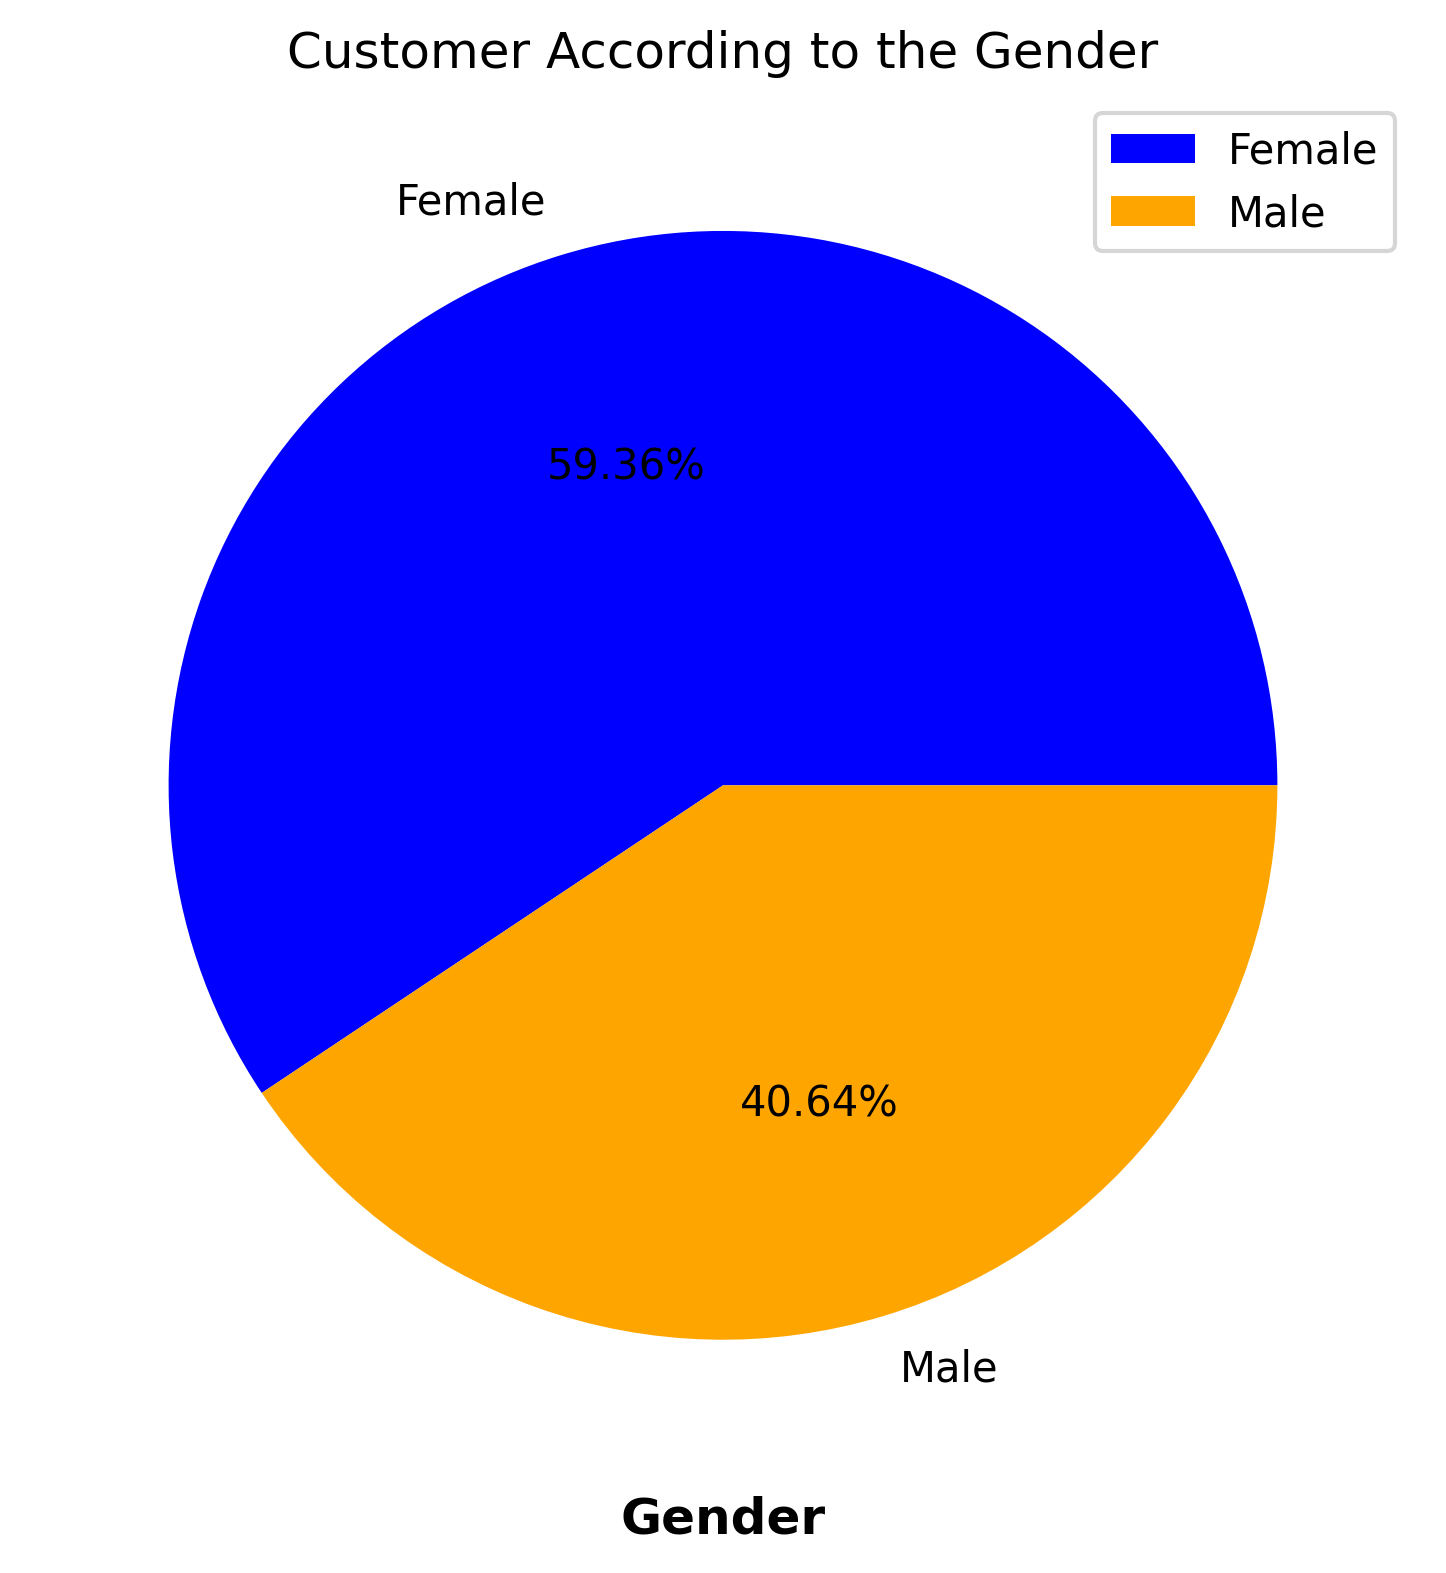

In [70]:
plt.figure(figsize=(6, 6), dpi=300)
plt.pie(
    data["Gender"].value_counts(),
    labels=data["Gender"].value_counts().index,
    autopct="%1.2f%%",
    colors=["blue", "orange"],
)
plt.title("Customer According to the Gender")
plt.legend(loc="best")
plt.xlabel(
    "Gender",
    fontdict={
        "fontsize": 12,
        "fontweight": "bold",
    },
)
plt.show()

*Bar Graph of Items Purchased*

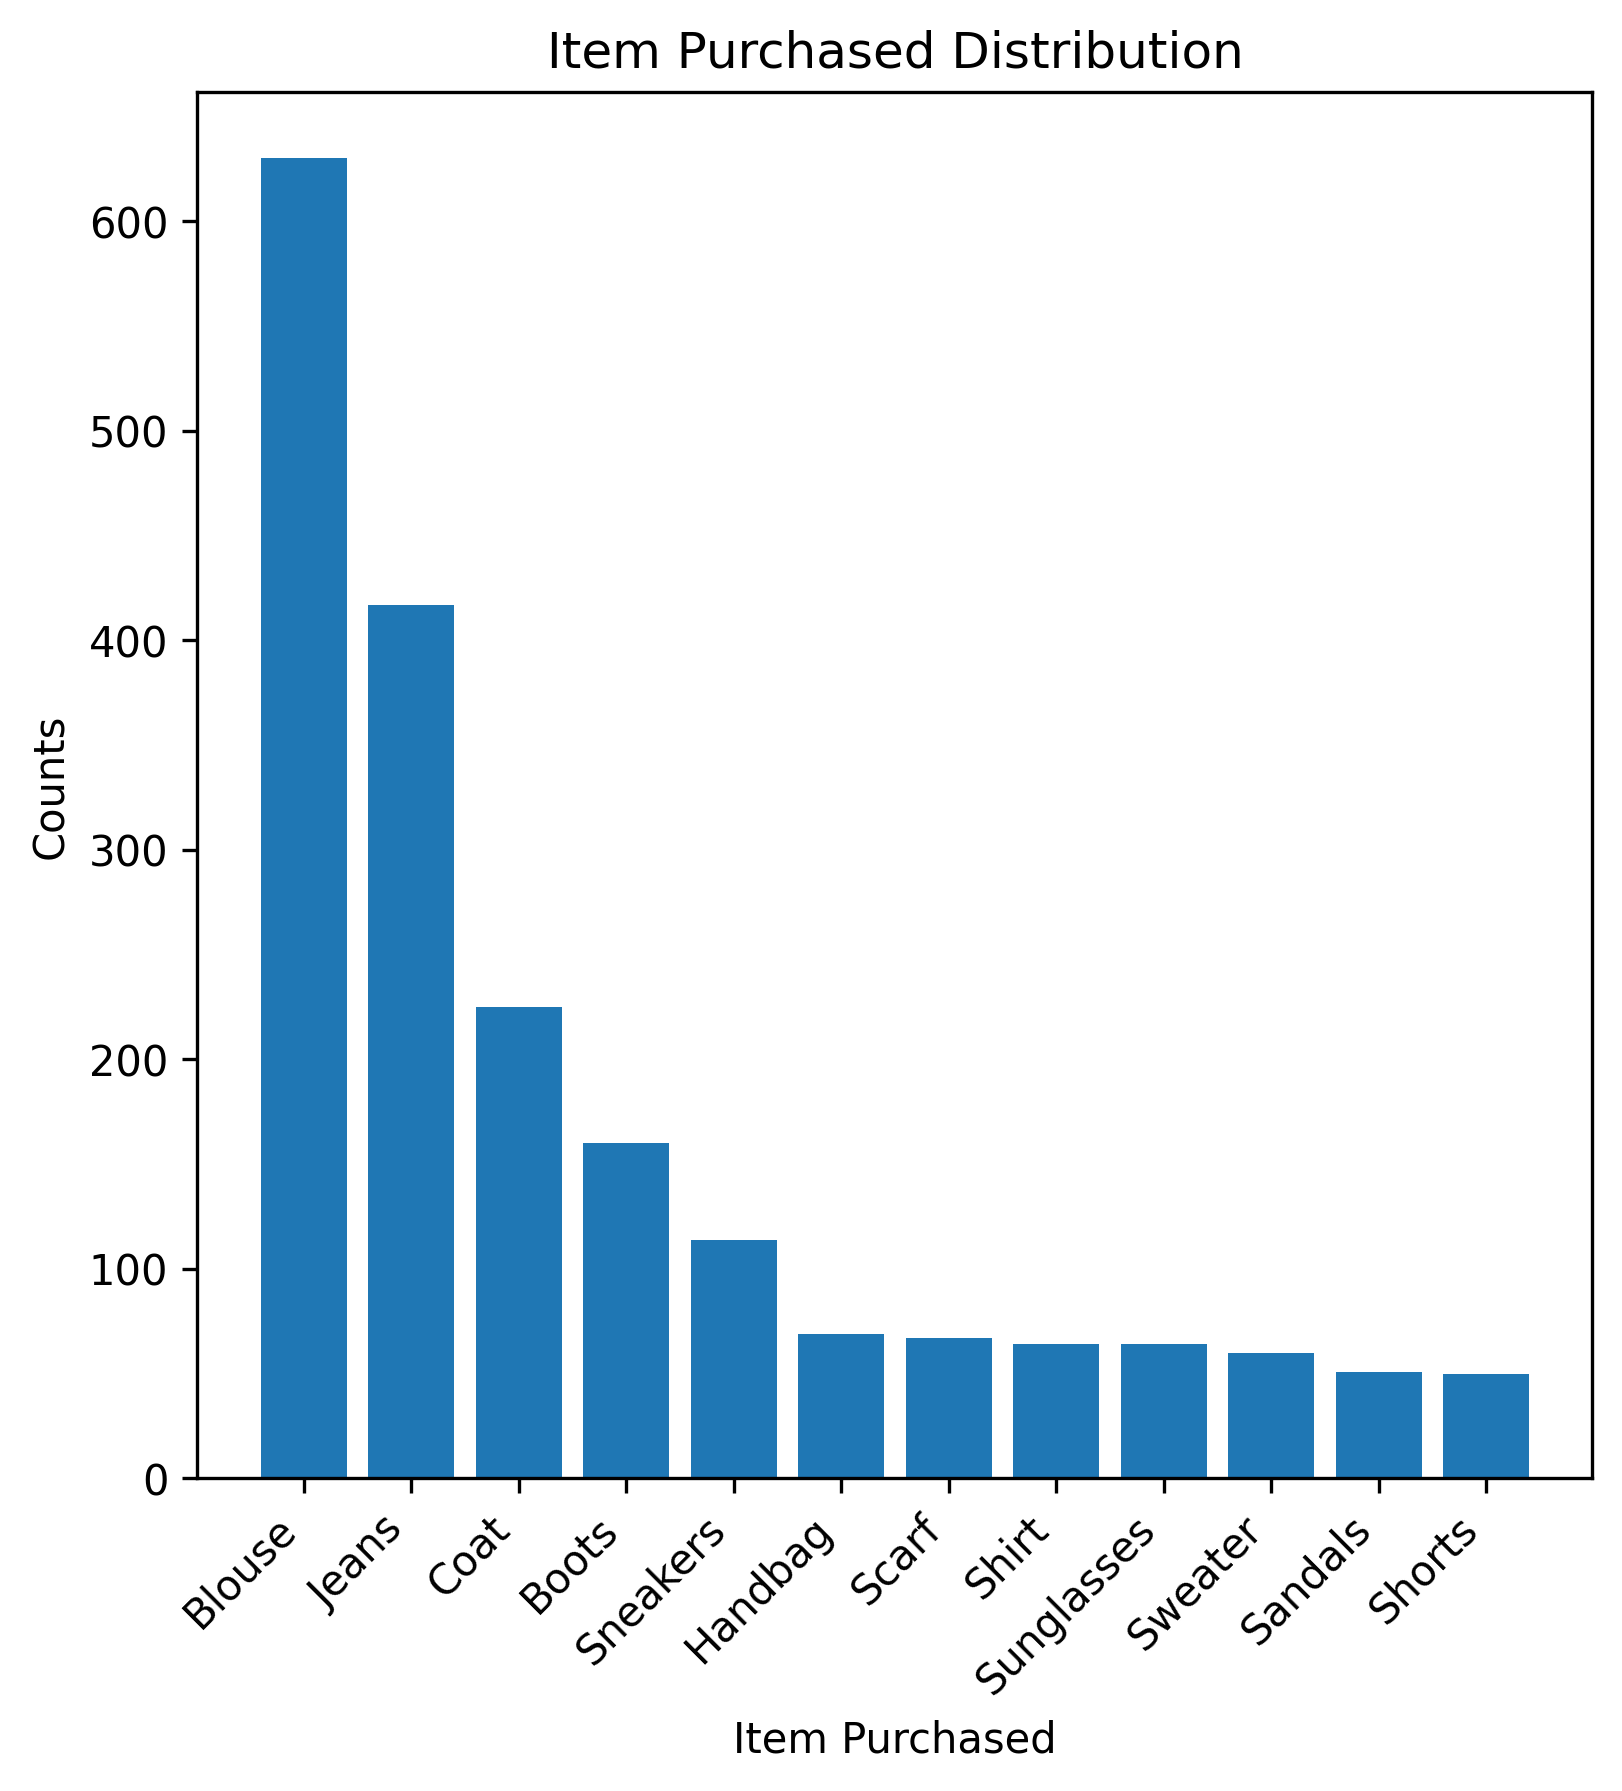

In [91]:
plt.figure(
    figsize=(6, 6),
    dpi=300,
)

plt.title("Item Purchased Distribution")
plt.xlabel("Item Purchased")
plt.ylabel("Counts")

plt.xticks(
    rotation=45,
    ha="right",
)

item_counts = data["Items Purchased"].value_counts()

plt.bar(item_counts.index, item_counts.values)

plt.savefig('../visuals/item_purchased_distribution_bar.png')

plt.show()

*Categories Distribution*

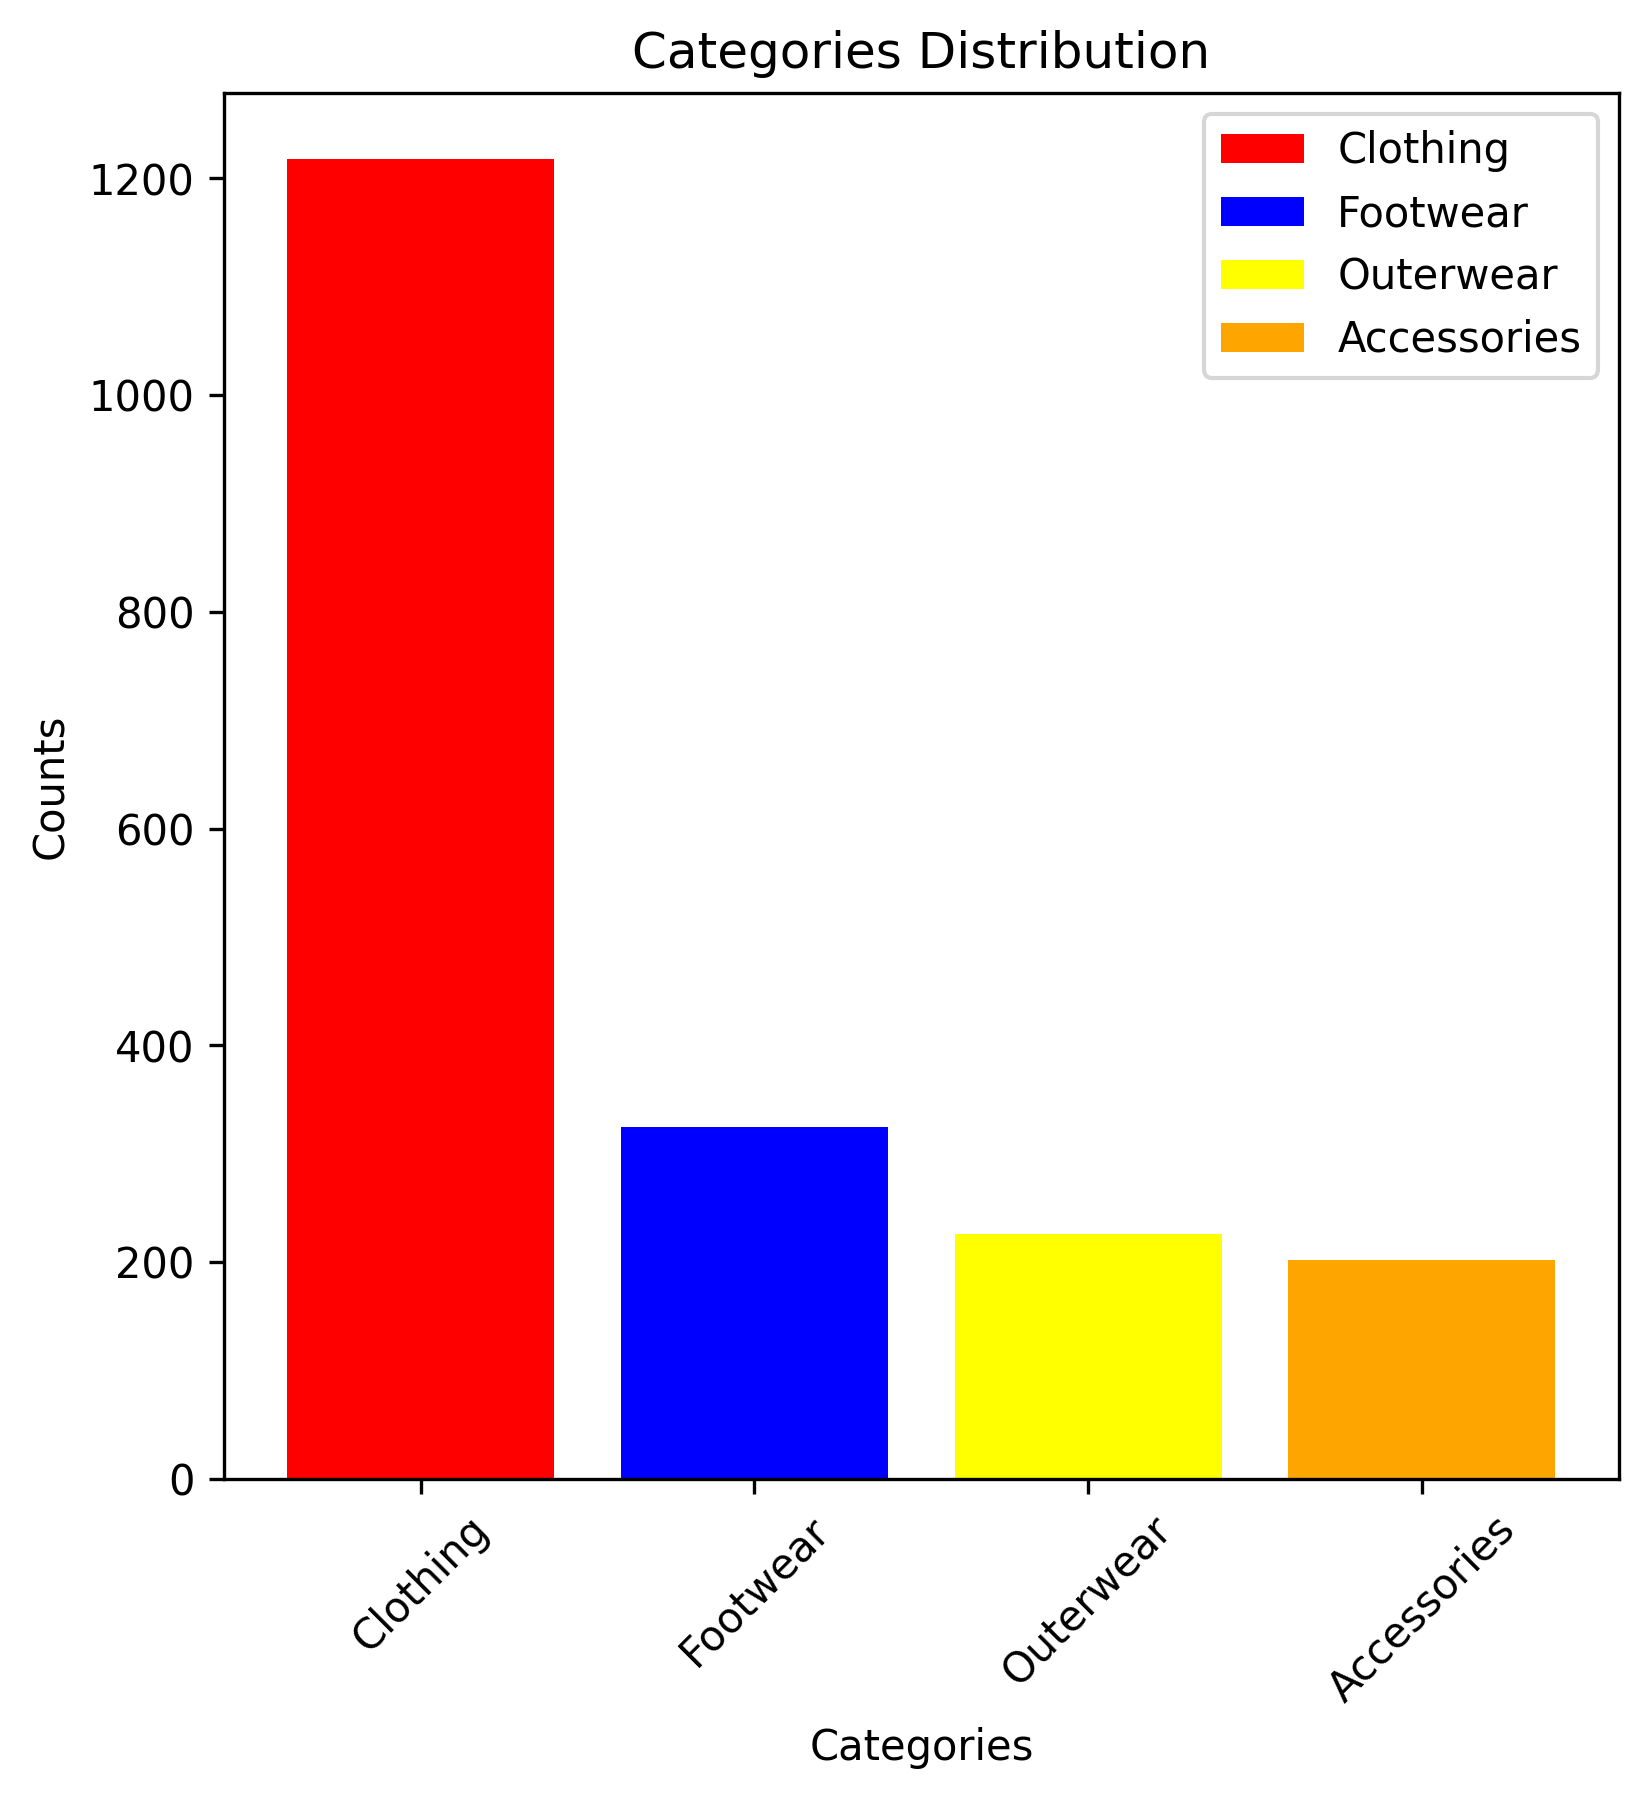

In [90]:
categories_count = data["Category"].value_counts()

plt.figure(figsize=(6, 6), dpi=300)

plt.title("Categories Distribution")
plt.xlabel("Categories")
plt.ylabel("Counts")

plt.bar(
    categories_count.index,
    categories_count.values,
    color=["red", "blue", "yellow", "orange", "green"],
    label=categories_count.index,
)

plt.xticks(rotation=45, ha="center")

plt.legend(loc="best")

plt.savefig('../visuals/categories_distribution_bar.png')
plt.show()

*pie chart according to the season*

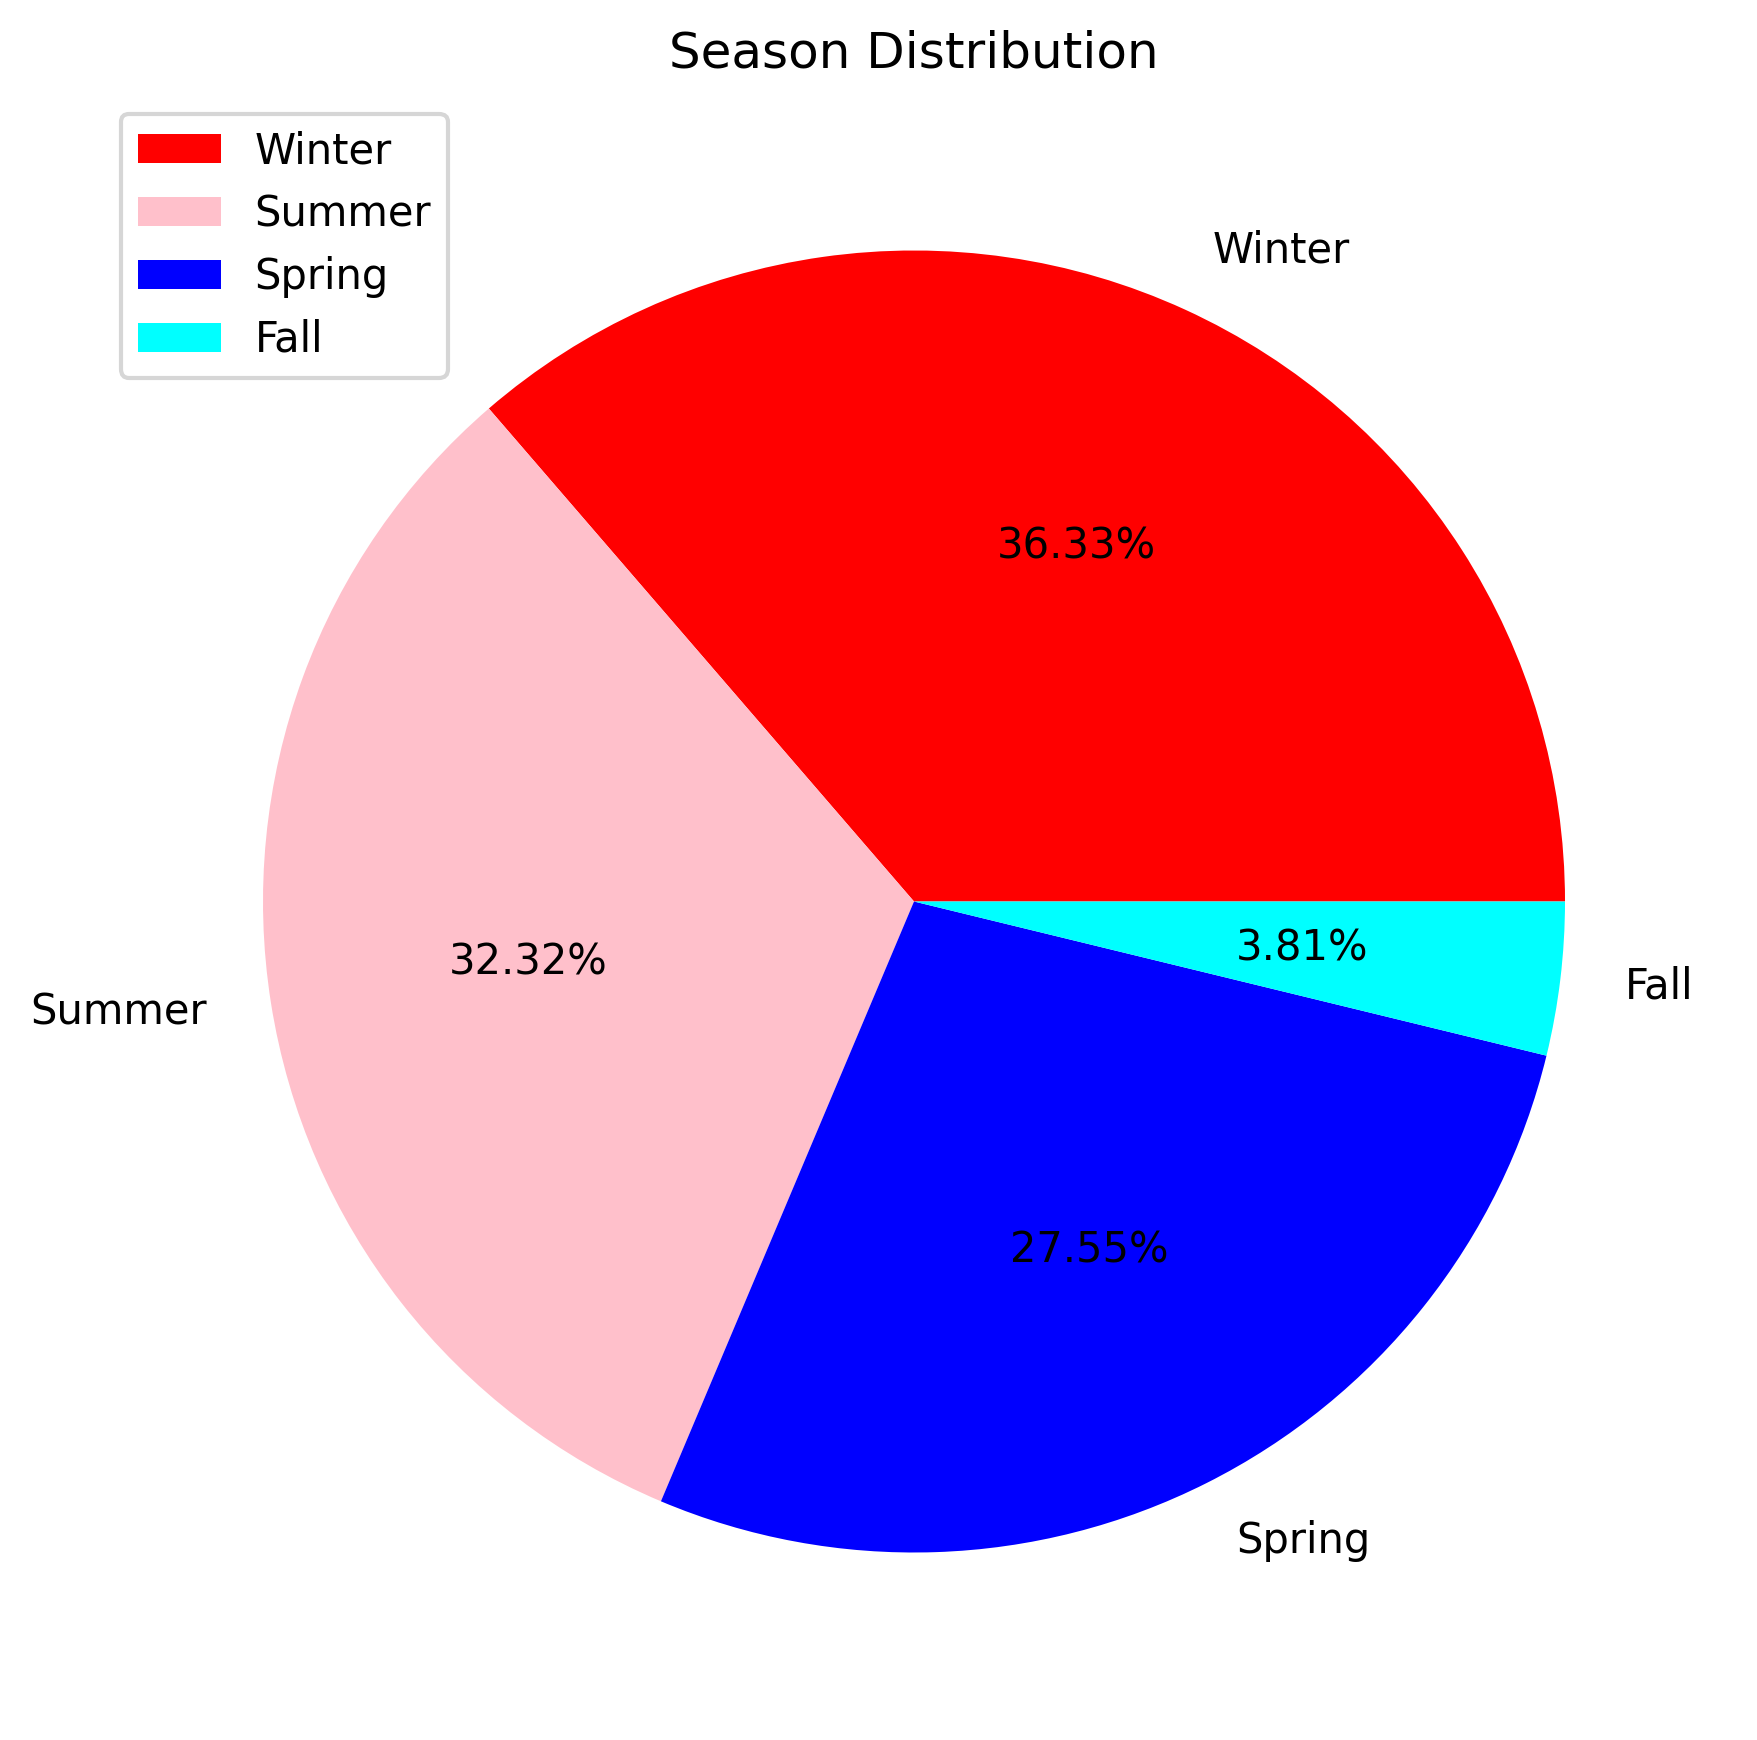

In [95]:
season_counts = data["Season"].value_counts()

plt.figure(
    figsize=(7, 7),
    dpi=300,
)

plt.title("Season Distribution")
plt.axis("equal")

plt.pie(
    season_counts,
    labels=season_counts.index,
    autopct="%1.2f%%",
    colors=["red", "pink", "blue", "cyan"],
)


plt.legend(loc="upper left")
plt.savefig('../visuals/season_pie_chart.png')
plt.show()

*Age Group Distribution*

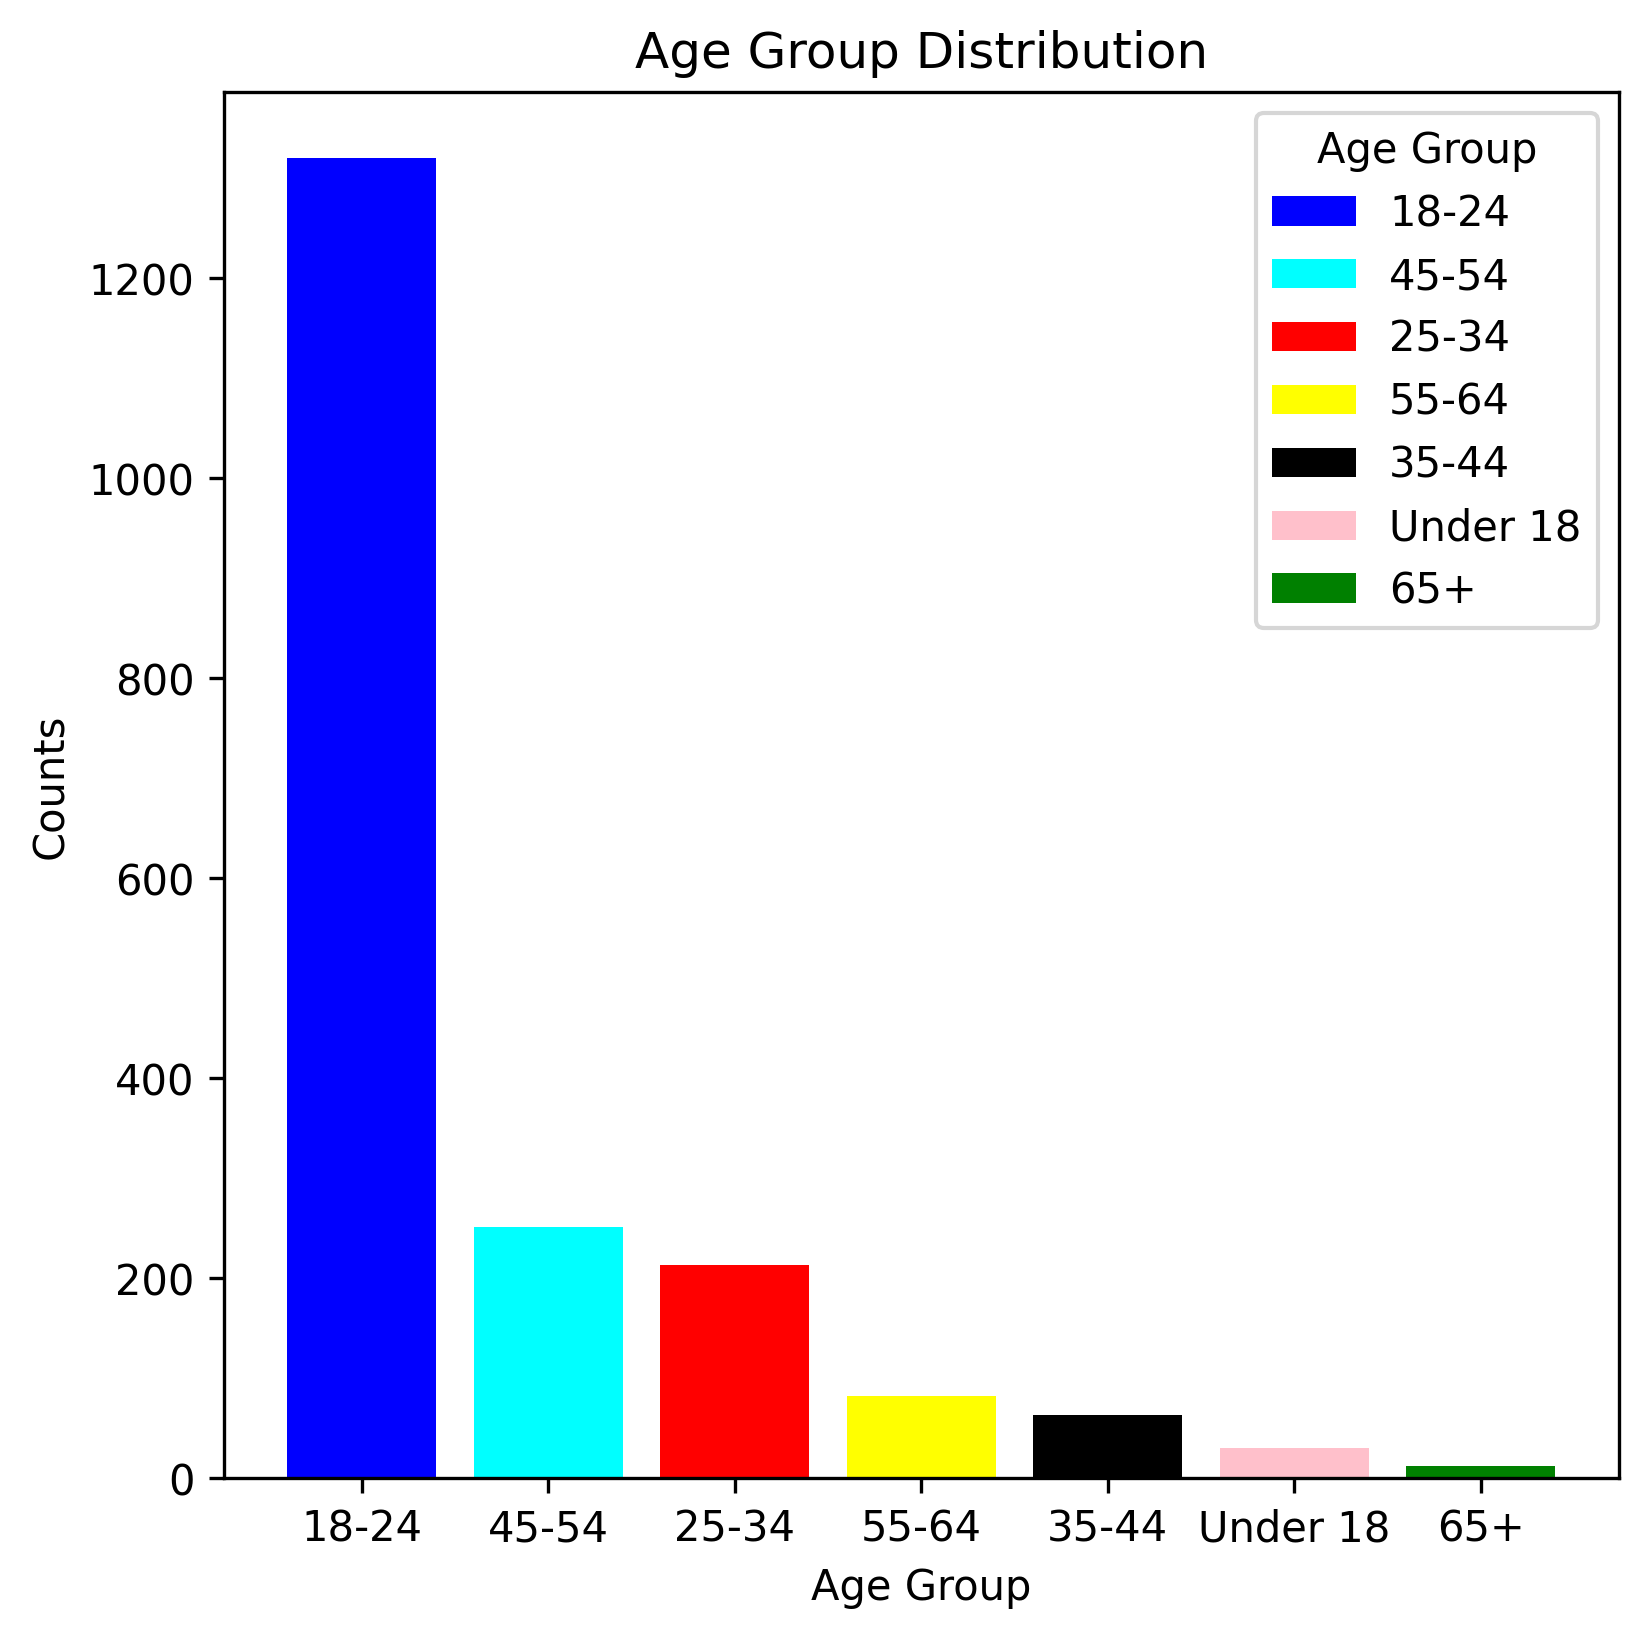

In [103]:
age_group_counts = data["Age Group"].value_counts()

plt.figure(
    figsize=(6, 6),
    dpi=300,
)

plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Counts")

plt.bar(
    age_group_counts.index,
    age_group_counts.values,
    label=age_group_counts.index,
    color=["blue", "cyan", "red", "yellow", "black", "pink", "green"],
)

plt.legend(
    title="Age Group",
    loc="best",
)

plt.savefig("../visuals/age_group_distribution_bar.png")
plt.show()